In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings


%matplotlib inline
plt.style.use('ggplot')
warnings.filterwarnings('ignore')


In [2]:

df = pd.read_csv('Final_Project_Dataset.csv')

print(f"Original Shape: {df.shape}")


df = df.sample(frac=1, random_state=42).reset_index(drop=True)


df.head() 

Original Shape: (720829, 30)


,frame.number,frame.time_epoch,frame.len,frame.cap_len,eth.src,eth.dst,ip.src,ip.dst,ip.len,ip.ttl,...,tcp.flags.fin,tcp.flags.reset,tcp.flags.push,tcp.window_size_value,tcp.stream,tcp.time_delta,tcp.time_relative,ftp.response.code,ftp.request.command,Label
0,125695,1.764543e+09,66,66,00:0c:29:fa:dd:2a,00:0c:29:af:84:a4,192.168.57.128,192.168.57.143,52.0,64.0,...,False,False,False,48768.0,394.0,9.100000e-08,0.035335,NaN,NaN,0
1,401091,1.764543e+09,66,66,00:0c:29:fa:dd:2a,00:0c:29:af:84:a4,192.168.57.128,192.168.57.143,52.0,64.0,...,False,False,False,44966.0,1221.0,5.000000e-08,0.072837,NaN,NaN,0
2,316546,1.764543e+09,23234,23234,00:0c:29:af:84:a4,00:0c:29:fa:dd:2a,192.168.57.143,192.168.57.128,23220.0,64.0,...,False,False,True,32485.0,972.0,1.057900e-05,0.002695,NaN,NaN,0
3,393847,1.764543e+09,66,66,00:0c:29:fa:dd:2a,00:0c:29:af:84:a4,192.168.57.128,192.168.57.143,52.0,64.0,...,False,False,False,48768.0,1200.0,4.207359e-03,0.062189,NaN,NaN,0
4,366376,1.764543e+09,66,66,00:0c:29:fa:dd:2a,00:0c:29:af:84:a4,192.168.57.128,192.168.57.143,52.0,64.0,...,False,False,False,8067.0,1121.0,1.120100e-05,0.005782,NaN,NaN,0


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720829 entries, 0 to 720828
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   frame.number           720829 non-null  int64  
 1   frame.time_epoch       720829 non-null  float64
 2   frame.len              720829 non-null  int64  
 3   frame.cap_len          720829 non-null  int64  
 4   eth.src                720829 non-null  object 
 5   eth.dst                720829 non-null  object 
 6   ip.src                 720829 non-null  object 
 7   ip.dst                 720829 non-null  object 
 8   ip.len                 720829 non-null  float64
 9   ip.ttl                 720829 non-null  float64
 10  ip.proto               720829 non-null  float64
 11  tcp.srcport            720829 non-null  float64
 12  tcp.dstport            720829 non-null  float64
 13  tcp.len                720829 non-null  float64
 14  tcp.seq           

,frame.number,frame.time_epoch,frame.len,frame.cap_len,ip.len,ip.ttl,ip.proto,tcp.srcport,tcp.dstport,tcp.len,tcp.seq,tcp.ack,tcp.hdr_len,tcp.window_size_value,tcp.stream,tcp.time_delta,tcp.time_relative,ftp.response.code,Label
count,720829.000000,7.208290e+05,720829.000000,720829.000000,720829.000000,720829.000000,720829.0,720829.000000,720829.000000,720829.000000,7.208290e+05,7.208290e+05,720829.000000,720829.000000,720829.000000,7.208290e+05,720829.000000,55805.000000,720829.000000
mean,160755.443765,1.764538e+09,2819.238556,2819.238556,2805.163445,65.361179,6.0,32298.654946,36184.255640,2753.411970,4.381294e+05,1.087089e+06,31.751475,22439.733167,1176.602085,1.088563e-01,1.884637,351.633169,0.330671
std,133963.614542,7.146047e+03,8323.562467,8323.562467,8323.587393,9.236213,0.0,21087.627284,20460.110783,8323.549037,1.186929e+06,6.784413e+06,3.282559,22354.106981,1177.444801,2.801412e+00,12.381719,129.436019,0.470455
min,1.000000,1.764527e+09,54.000000,54.000000,40.000000,38.000000,6.0,21.000000,21.000000,0.000000,0.000000e+00,0.000000e+00,20.000000,0.000000,0.000000,-5.185200e-05,0.000000,150.000000,0.000000
25%,49337.000000,1.764531e+09,66.000000,66.000000,52.000000,64.000000,6.0,11628.000000,27950.000000,0.000000,1.000000e+00,1.200000e+01,32.000000,502.000000,394.000000,9.000000e-08,0.012289,221.000000,0.000000
50%,110426.000000,1.764543e+09,66.000000,66.000000,52.000000,64.000000,6.0,36916.000000,42100.000000,0.000000,1.000000e+00,1.900000e+02,32.000000,17298.000000,856.000000,3.287200e-05,0.034792,331.000000,0.000000
75%,269815.000000,1.764543e+09,86.000000,86.000000,72.000000,64.000000,6.0,49859.000000,51628.000000,20.000000,1.110000e+02,1.772073e+06,32.000000,46713.000000,1306.000000,3.036250e-04,0.112308,530.000000,1.000000
max,450324.000000,1.764564e+09,65226.000000,65226.000000,65212.000000,128.000000,6.0,65503.000000,65503.000000,65160.000000,1.048576e+07,1.556803e+09,52.000000,65535.000000,5548.000000,3.013427e+02,1204.140989,530.000000,1.000000


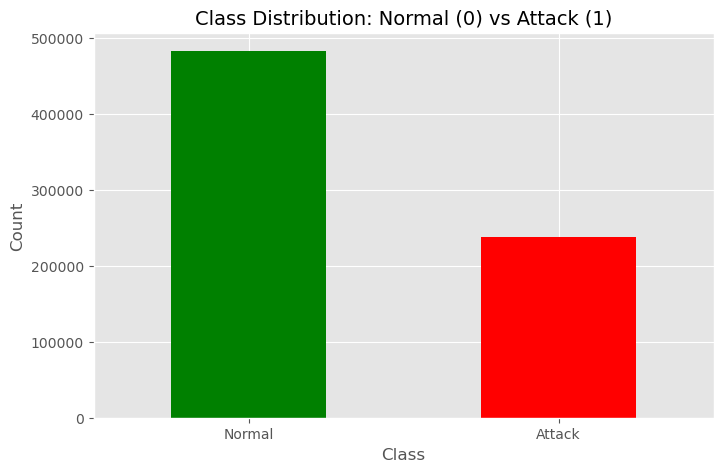

In [3]:
print("--- Data Info ---")
print(df.info())

print("\n--- Data Description ---")
display(df.describe())

plt.figure(figsize=(8, 5))
counts = df['Label'].value_counts()
counts.plot(kind='bar', color=['green', 'red'])
plt.title('Class Distribution: Normal (0) vs Attack (1)', fontsize=14)
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Normal', 'Attack'], rotation=0)
plt.show()

In [4]:
cols_to_drop = [
    'frame.number', 
    'frame.time_epoch', 
    'frame.cap_len', 
    'eth.src',
    'eth.dst', 
    'ip.src',
    'ip.dst', 
    'ip.proto',         
    'tcp.stream', 
    'tcp.time_relative', 
    'tcp.seq',
    'tcp.ack',       
]

df_clean = df.drop(columns=[c for c in cols_to_drop if c in df.columns])
print(f" Dropped Columns. New Shape: {df_clean.shape}")

flag_cols = ["tcp.flags.syn", "tcp.flags.ack", "tcp.flags.fin", "tcp.flags.reset", "tcp.flags.push"]
existing_flags = [c for c in flag_cols if c in df_clean.columns]

if existing_flags:
    before_rows = len(df_clean)
    df_clean = df_clean.dropna(subset=existing_flags, how='all')
    after_rows = len(df_clean)
    print(f" Extra Cleaning: Removed {before_rows - after_rows} rows with no TCP Flags.")
    
df_clean = df_clean.fillna(0)

le = LabelEncoder()
for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = df_clean[col].astype(str)
    df_clean[col] = le.fit_transform(df_clean[col])


 Dropped Columns. New Shape: (720829, 18)
 Extra Cleaning: Removed 0 rows with no TCP Flags.


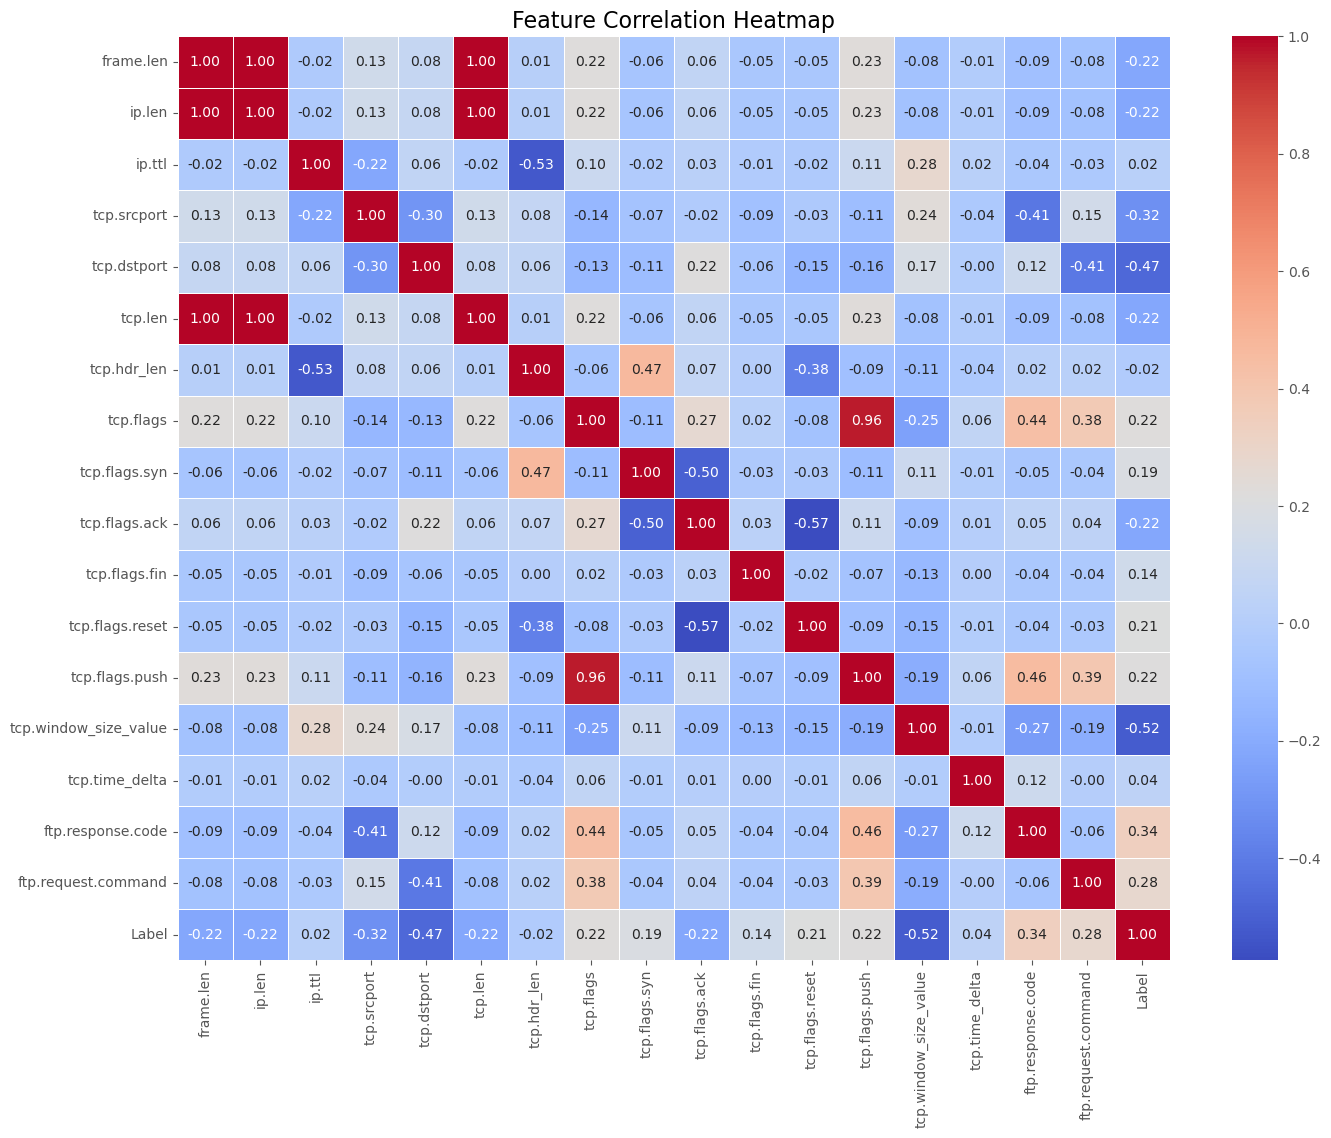

In [5]:
plt.figure(figsize=(16, 12))

sns.heatmap(df_clean.corr(), 
            annot=True,        
            fmt='.2f',         
            cmap='coolwarm', 
            linewidths=0.5)

plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()

In [6]:

X = df_clean.drop('Label', axis=1)
y = df_clean['Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print(f"Training Rows: {len(X_train)}")
print(f"Testing Rows:  {len(X_test)}")

rf_model = RandomForestClassifier(
    n_estimators=200,         
    max_depth=8,             
    min_samples_split=30,     
    min_samples_leaf=10,      
    max_features='sqrt',    
    class_weight='balanced',  
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

print("Model Trained Successfully with Regularization!")


Training Rows: 504580
Testing Rows:  216249
Model Trained Successfully with Regularization!


In [7]:
 y_train.head(20)

381040    0
332259    0
378069    1
159200    1
479638    0
33594     1
402584    0
676863    0
691004    0
652838    1
607041    1
41870     0
473231    1
652929    0
275523    1
390549    0
604024    1
62632     0
527162    0
663760    0
Name: Label, dtype: int64

 FINAL ACCURACY: 98.71%
------------------------------
              precision    recall  f1-score   support

      Normal       0.99      0.99      0.99    144742
      Attack       0.97      0.99      0.98     71507

    accuracy                           0.99    216249
   macro avg       0.98      0.99      0.99    216249
weighted avg       0.99      0.99      0.99    216249



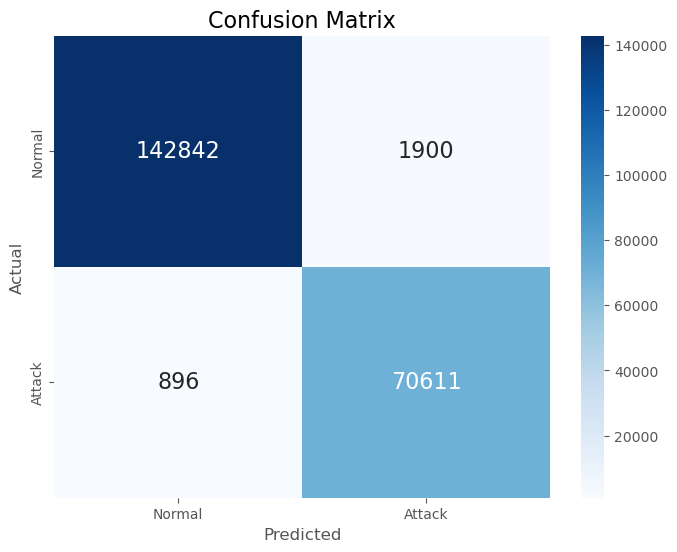

In [8]:
y_pred = rf_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f" FINAL ACCURACY: {acc*100:.2f}%")
print("-" * 30)
print(classification_report(y_test, y_pred, target_names=['Normal', 'Attack']))

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'],
            annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

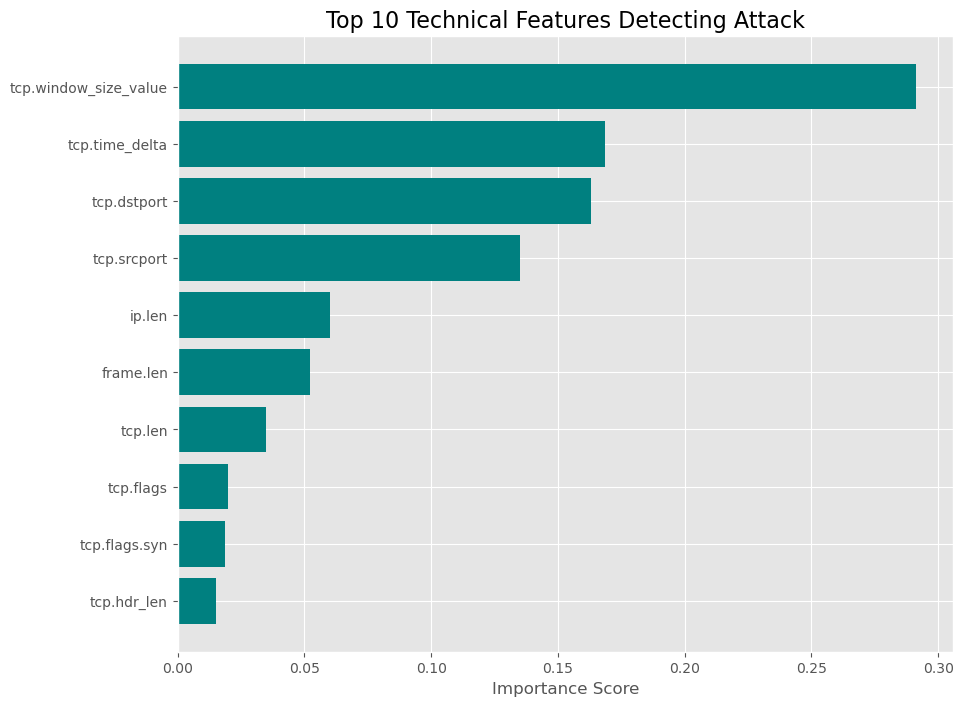

In [9]:
plt.figure(figsize=(10, 8))
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 10 

plt.title('Top 10 Technical Features Detecting Attack', fontsize=16)
plt.barh(range(top_n), importances[indices[:top_n]], align='center', color='teal')
plt.yticks(range(top_n), [X.columns[i] for i in indices[:top_n]])
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.show()

 Training Accuracy: 98.76%
 Testing Accuracy:  98.71%
 Good News: No significant Overfitting detected.


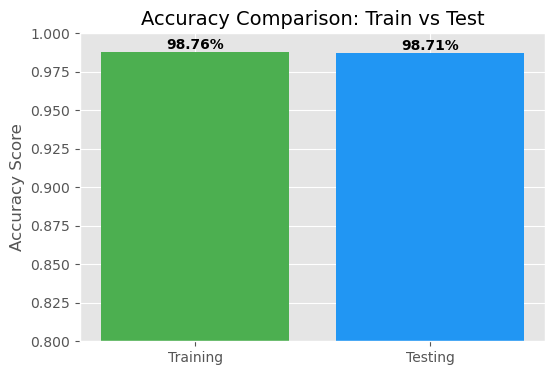

 Generating Learning Curve (This may take a moment)...


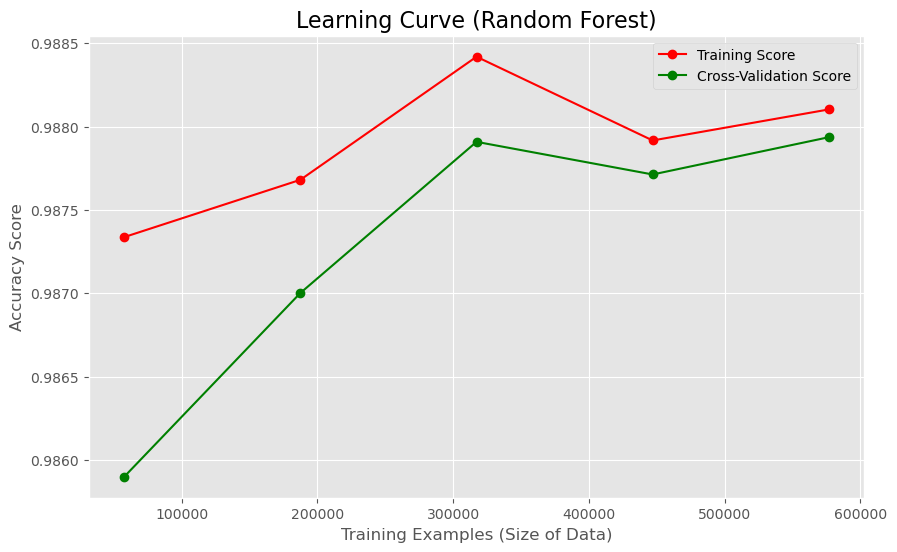

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

train_acc = rf_model.score(X_train, y_train)
test_acc = rf_model.score(X_test, y_test)

print(f" Training Accuracy: {train_acc*100:.2f}%")
print(f" Testing Accuracy:  {test_acc*100:.2f}%")

if (train_acc - test_acc) > 0.05:
    print(" Warning: Possible Overfitting detected! (Difference > 5%)")
else:
    print(" Good News: No significant Overfitting detected.")

plt.figure(figsize=(6, 4))
plt.bar(['Training', 'Testing'], [train_acc, test_acc], color=['#4CAF50', '#2196F3'])
plt.ylim(0.8, 1.0) 
plt.title('Accuracy Comparison: Train vs Test', fontsize=14)
plt.ylabel('Accuracy Score')
for i, v in enumerate([train_acc, test_acc]):
    plt.text(i, v, f"{v*100:.2f}%", ha='center', va='bottom', fontweight='bold')
plt.show()


print(" Generating Learning Curve (This may take a moment)...")

train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X, y, cv=5, scoring='accuracy', n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 5)
)


train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-Validation Score")

plt.title("Learning Curve (Random Forest)", fontsize=16)
plt.xlabel("Training Examples (Size of Data)", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=12)
plt.legend(loc="best")
plt.grid(True)
plt.show()

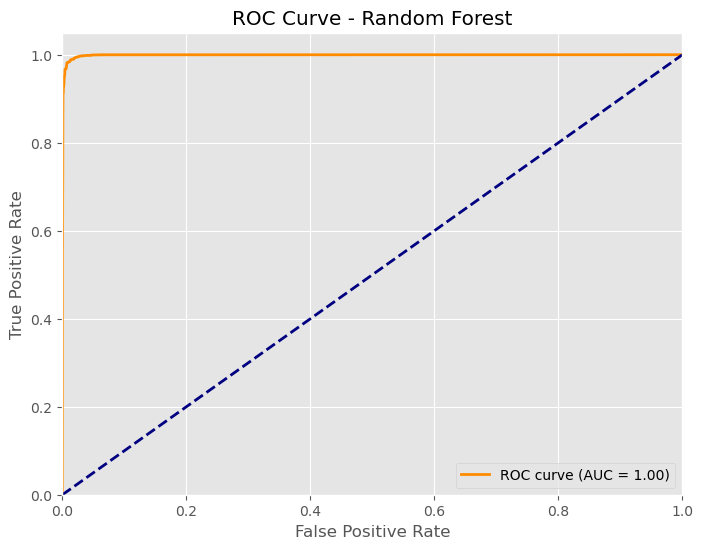

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


In [12]:
import joblib
import os

print(" Saving the Model...")

model_filename = 'ftp_ids_model.pkl'


joblib.dump(rf_model, model_filename)

print(f" Model saved successfully as: {model_filename}")
print(f" File location: {os.getcwd()}") 

loaded_model = joblib.load(model_filename)
print(" Tested loading: The model works perfectly!")

 Saving the Model...
 Model saved successfully as: ftp_ids_model.pkl
 File location: C:\Users\user\Desktop\PROJECTS\network security
 Tested loading: The model works perfectly!


In [13]:
from sklearn.metrics import recall_score


y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)



train_recall = recall_score(y_train, y_train_pred, pos_label=1)
test_recall = recall_score(y_test, y_test_pred, pos_label=1)

print("-" * 30)
print(f" Training Recall: {train_recall*100:.2f}%")
print(f" Testing Recall:  {test_recall*100:.2f}%")
print("-" * 30)



------------------------------
 Training Recall: 98.86%
 Testing Recall:  98.75%
------------------------------
